In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Zestaw danych
### Liczba uczniów cudzoziemców według statusu - dane SIO według stanu na 30 września 2024 r. 

In [2]:
# url = "https://dane.gov.pl/embed/resource/65513"
# df = pd.read_csv(url)

df = pd.read_csv("./liczba_uczniów_nie_są_obywat_polskimi_wg_statusu_typ_podm_30.09.2024.csv")

# Sprawdzenie rozmiaru i kolumn
print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")
print("Kolumny:", df.columns.tolist()[:10], "...")

display(df[df.columns[:14]].head())
display(df[df.columns[14:]].head())


Liczba rekordów: 7297, liczba kolumn: 28
Kolumny: ['idTerytGmina', 'idTerytWojewodztwo', 'Wojewodztwo', 'Powiat', 'Gmina', 'Typ obszaru', 'idTypPodmiotu', 'Typ podmiotu', 'lb_ucz_cudzoziem_ogółem', 'obywatel państwa członkowskiego UE, państwa członkowskiego EFTA lub Konfederacji Szwajcarskiej albo członek rodziny takiej osoby posiadający prawo pobytu lub prawo stałego pobytu'] ...


,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,Typ obszaru,idTypPodmiotu,Typ podmiotu,lb_ucz_cudzoziem_ogółem,"obywatel państwa członkowskiego UE, państwa członkowskiego EFTA lub Konfederacji Szwajcarskiej albo członek rodziny takiej osoby posiadający prawo pobytu lub prawo stałego pobytu",osoba pochodzenia polskiego w rozumieniu przepisów o repatriacji,"osoba, której udzielono zezwolenia na osiedlenie się na terytorium RP",osoba posiadająca ważną Kartę Polaka,"osoba, której nadano status uchodźcy, albo członek rodziny takiej osoby"
0,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,1,Przedszkole,102,2.0,NaN,NaN,NaN,52.0
1,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,3,Szkoła podstawowa,317,NaN,NaN,NaN,NaN,52.0
2,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,14,Liceum ogólnokształcące,45,1.0,NaN,NaN,NaN,3.0
3,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,16,Technikum,90,1.0,NaN,NaN,NaN,20.0
4,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,19,Szkoła policealna,177,NaN,NaN,NaN,2.0,43.0


,osoba posiadająca zgodę na pobyt tolerowany,"osoba, której udzielono ochrony uzupełniającej, albo członek rodziny takiej osoby",osoba korzystająca z ochrony czasowej na terytorium RP,"osoba, której na terytorium RP udzielono zezwolenia na pobyt rezydenta długoterminowego UE","osoba, której na terytorium RP udzielono zezwolenia na zamieszkanie na czas oznaczony w związku z okolicznością, o której mowa w art. 53 ust. 1 pkt 7, 13 i 14 ustawy o cudzoziemcach",członek rodziny osoby ubiegającej się o nadanie statusu uchodźcy,"osoba, której uprawnienie do nauki wynika z umowy międzynarodowej.",inny,"osoba, której udzielono zezwolenia na pobyt stały na terytorium RP","osoba, której udzielono zgody na pobyt ze względów humanitarnych, albo członek rodziny takiej osoby","osoba, której na terytorium RP udzielono zezwolenia na pobyt czasowy w związku z okolicznością, o której mowa w art. 127, art.159 ust. 1, art. 176 lub art. 186 ust. 1 pkt 3 lub 4 ustawy o cudzoziemcach","osoba, która posiada kartę pobytu z adnotacją ""dostęp do rynku pracy"", wizę Schengen lub wizę krajową wydaną w celu wykonywania pracy na terytorium RP",członek rodziny osoby ubiegającej się o udzielenie ochrony międzynarodowej,brak statusu w SIO
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,9,NaN,3.0,NaN,NaN,1.0
1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,241.0,5,NaN,14.0,NaN,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,6.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,2,3.0,1.0,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,67.0,63.0,NaN,NaN


## Wstępne etapy pipeline'u ML

### Wczytanie i podstawowy opis danych

In [3]:
# Podstawowe statystyki zmiennej celu
target = 'lb_ucz_cudzoziem_ogółem'
print(df[target].describe())

# Przykład: suma uczniów-cudzoziemców wg typu obszaru
print(df.groupby('Typ obszaru')[target].sum())


count     7297.000000
mean        49.442099
std        403.368199
min          1.000000
25%          2.000000
50%          6.000000
75%         18.000000
max      21355.000000
Name: lb_ucz_cudzoziem_ogółem, dtype: float64
Typ obszaru
obszar miejski    331412
obszar wiejski     29367
Name: lb_ucz_cudzoziem_ogółem, dtype: int64


### Możliwości zastosowania w uczeniu maszynowym
Dane umożliwiają wykorzystanie uczenia nadzorowanego, ponieważ mamy wyraźny zbiór zmiennych objaśniających i można określić zmienną celu (target). Przykładowo, można próbować przewidzieć liczbę uczniów cudzoziemców w szkole na podstawie cech lokalizacyjnych i typu szkoły. Jeśli ustawimy liczbę cudzoziemców jako zmienną docelową (regresja), mamy typowe zadanie regresyjne. Alternatywnie można by rozważyć klasyfikację (np. czy liczba uczniów obcokrajowców przekroczy pewną wartość progową), ale tu logiczniejsze wydaje się użycie regresji dla zmiennej ciągłej, która sumuje informacje ze statusów pobytowych.

>Krótka refleksja: ponieważ w danych występują zmienne objaśniające (np. Województwo, typ szkoły, etc.) oraz cel, zadanie jest naturalnie nadzorowane. Uczenie nadzorowane z regresją/klasyfikacją jest zasadne – pozwala np. na modelowanie wpływu regionu i rodzaju szkoły na liczbę uczniów-cudzoziemców. Ponadto dane nie posiadają etykiet, które wymagałyby grupowania czy wykrywania struktur ukrytych (co charakteryzuje uczenie nienadzorowane).

### Feature Engineering

In [4]:
# 1) Zmiana nazw kolumn na krótsze (usunięcie polskich znaków i spacji)
df = df.rename(columns={
    'Typ obszaru': 'Typ_obszaru',
    'Typ podmiotu': 'Typ_podmiotu',
    'lb_ucz_cudzoziem_ogółem': 'Liczba_ogolem',
    'brak statusu w SIO': 'Brak_statusu'
})
# Uproszczone nazwy statusów (przytnij długie opisy)
df = df.rename(columns= {
    'obywatel państwa członkowskiego UE, państwa członkowskiego EFTA lub Konfederacji Szwajcarskiej albo członek rodziny takiej osoby posiadający prawo pobytu lub prawo stałego pobytu': 'obywatel_UE_EFTA_SZWAJCARIA',
    'osoba pochodzenia polskiego w rozumieniu przepisów o repatriacji': 'pochodzenie_polskie',
    'osoba, której udzielono zezwolenia na osiedlenie się na terytorium RP': 'zezwolenie_osiedlenie',
    'osoba posiadająca ważną Kartę Polaka': 'karta_polaka',
    'osoba, której nadano status uchodźcy, albo członek rodziny takiej osoby': 'status_uchodźcy',
    'osoba posiadająca zgodę na pobyt tolerowany': 'pobyt_tolerowany',
    'osoba, której udzielono ochrony uzupełniającej, albo członek rodziny takiej osoby': 'ochrona_uzupelniajaca',
    'osoba korzystająca z ochrony czasowej na terytorium RP': 'ochrona_czasowa',
    'osoba, której na terytorium RP udzielono zezwolenia na pobyt rezydenta długoterminowego UE': 'pobyt_rezydent_UE',
    'osoba, której na terytorium RP udzielono zezwolenia na zamieszkanie na czas oznaczony w związku z okolicznością, o której mowa w art. 53 ust. 1 pkt 7, 13 i 14 ustawy o cudzoziemcach': 'pobyt_czasowy_art53',
    'członek rodziny osoby ubiegającej się o nadanie statusu uchodźcy': 'rodzina_uchodźcy',
    'osoba, której uprawnienie do nauki wynika z umowy międzynarodowej.': 'nauka_umowa_miedzynarodowa',
    'osoba, której udzielono zezwolenia na pobyt stały na terytorium RP': 'pobyt_stały',
    'osoba, której udzielono zgody na pobyt ze względów humanitarnych, albo członek rodziny takiej osoby': 'pobyt_humanitarny',
    'osoba, której na terytorium RP udzielono zezwolenia na pobyt czasowy w związku z okolicznością, o której mowa w art. 127, art.159 ust. 1, art. 176 lub art. 186 ust. 1 pkt 3 lub 4 ustawy o cudzoziemcach': 'pobyt_czasowy_inne',
    'osoba, która posiada kartę pobytu z adnotacją "dostęp do rynku pracy", wizę Schengen lub wizę krajową wydaną w celu wykonywania pracy na terytorium RP': 'karta_pobytu_rynek_pracy',
    'członek rodziny osoby ubiegającej się o udzielenie ochrony międzynarodowej': 'rodzina_ochrona_miedzynarodowa'
})


In [5]:
display(df.head())
print(df.columns)

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,Typ_obszaru,idTypPodmiotu,Typ_podmiotu,Liczba_ogolem,obywatel_UE_EFTA_SZWAJCARIA,...,pobyt_czasowy_art53,rodzina_uchodźcy,nauka_umowa_miedzynarodowa,inny,pobyt_stały,pobyt_humanitarny,pobyt_czasowy_inne,karta_pobytu_rynek_pracy,rodzina_ochrona_miedzynarodowa,Brak_statusu
0,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,1,Przedszkole,102,2.0,...,NaN,NaN,NaN,34.0,9,NaN,3.0,NaN,NaN,1.0
1,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,3,Szkoła podstawowa,317,NaN,...,NaN,NaN,NaN,241.0,5,NaN,14.0,NaN,NaN,2.0
2,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,14,Liceum ogólnokształcące,45,1.0,...,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,6.0
3,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,16,Technikum,90,1.0,...,NaN,NaN,NaN,62.0,2,3.0,1.0,NaN,NaN,1.0
4,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,19,Szkoła policealna,177,NaN,...,NaN,NaN,NaN,NaN,2,NaN,67.0,63.0,NaN,NaN


Index(['idTerytGmina', 'idTerytWojewodztwo', 'Wojewodztwo', 'Powiat', 'Gmina',
       'Typ_obszaru', 'idTypPodmiotu', 'Typ_podmiotu', 'Liczba_ogolem',
       'obywatel_UE_EFTA_SZWAJCARIA', 'pochodzenie_polskie',
       'zezwolenie_osiedlenie', 'karta_polaka', 'status_uchodźcy',
       'pobyt_tolerowany', 'ochrona_uzupelniajaca', 'ochrona_czasowa',
       'pobyt_rezydent_UE', 'pobyt_czasowy_art53', 'rodzina_uchodźcy',
       'nauka_umowa_miedzynarodowa', 'inny', 'pobyt_stały',
       'pobyt_humanitarny', 'pobyt_czasowy_inne', 'karta_pobytu_rynek_pracy',
       'rodzina_ochrona_miedzynarodowa', 'Brak_statusu'],
      dtype='object')


In [6]:
# 2. Sprawdzenie brakujących wartości (Missing Values)
missing_values = df.isnull().sum().sort_values(ascending=False).reset_index()
missing_values.columns = ['Column', 'Missing values']
missing_values['Missing percent'] = (df.isnull().mean().sort_values(ascending=False)).values.round(4)*100
display(missing_values)
print(missing_values)


,Column,Missing values,Missing percent
0,rodzina_uchodźcy,7294,99.96
1,pobyt_czasowy_art53,7286,99.85
2,zezwolenie_osiedlenie,7271,99.64
3,rodzina_ochrona_miedzynarodowa,7212,98.84
4,pochodzenie_polskie,7195,98.60
5,ochrona_uzupelniajaca,7122,97.60
6,nauka_umowa_miedzynarodowa,7078,97.00
7,pobyt_tolerowany,7041,96.49
8,pobyt_rezydent_UE,6989,95.78
9,pobyt_humanitarny,6835,93.67


                            Column  Missing values  Missing percent
0                 rodzina_uchodźcy            7294            99.96
1              pobyt_czasowy_art53            7286            99.85
2            zezwolenie_osiedlenie            7271            99.64
3   rodzina_ochrona_miedzynarodowa            7212            98.84
4              pochodzenie_polskie            7195            98.60
5            ochrona_uzupelniajaca            7122            97.60
6       nauka_umowa_miedzynarodowa            7078            97.00
7                 pobyt_tolerowany            7041            96.49
8                pobyt_rezydent_UE            6989            95.78
9                pobyt_humanitarny            6835            93.67
10     obywatel_UE_EFTA_SZWAJCARIA            6623            90.76
11                 ochrona_czasowa            6600            90.45
12        karta_pobytu_rynek_pracy            6507            89.17
13                    karta_polaka            64

>- Wszystkie statusy pobytowe -> MNAR
>- `Brak_statusu` -> Jeśli odnosi się do braku jakiegokolwiek statusu w SIO – też MNAR
> - Braki w danych dotyczące statusów pobytu cudzoziemców są typu MNAR, ponieważ brak wartości wynika bezpośrednio z faktu nieposiadania danego statusu.
> - Wypełniono brakujące wartości zerem (0), co oznacza brak danego statusu.

In [7]:
print(df.head(10))

   idTerytGmina  idTerytWojewodztwo   Wojewodztwo         Powiat        Gmina  \
0        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
1        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
2        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
3        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
4        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
5        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
6        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
7        201011                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
8        201022                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   
9        201022                   2  DOLNOŚLĄSKIE  bolesławiecki  Bolesławiec   

      Typ_obszaru  idTypPodmiotu                Typ_podmiotu  Liczba_ogolem  \
0  obszar miejski            

In [8]:
df = df.fillna(0)


In [9]:
df['Czy_miejski'] = df['Typ_obszaru'].map({'obszar miejski': 1, 'obszar wiejski': 0})

In [10]:
#df = pd.get_dummies(df, columns=['Wojewodztwo'])

In [11]:
print(df.nunique().sort_values(ascending=False))

idTerytGmina                      2252
Gmina                             2057
Liczba_ogolem                      394
Powiat                             370
inny                               279
status_uchodźcy                    211
pobyt_czasowy_inne                 108
karta_pobytu_rynek_pracy            91
pobyt_stały                         89
Brak_statusu                        75
ochrona_czasowa                     65
nauka_umowa_miedzynarodowa          47
karta_polaka                        45
pobyt_humanitarny                   33
obywatel_UE_EFTA_SZWAJCARIA         33
pobyt_tolerowany                    28
pobyt_rezydent_UE                   23
idTypPodmiotu                       22
Typ_podmiotu                        22
Wojewodztwo                         16
idTerytWojewodztwo                  16
rodzina_ochrona_miedzynarodowa      16
ochrona_uzupelniajaca               14
pochodzenie_polskie                  9
zezwolenie_osiedlenie                4
rodzina_uchodźcy         

### **Wybór zmiennej celu (TARGET)**

**Wybrana kolumna:** `Liczba_ogolem`

**Uzasadnienie:**

* Jest to agregowana liczba cudzoziemców w danej placówce, naturalny kandydat do regresji (lub klasyfikacji po skategoryzowaniu).
* Zmienna zawiera zróżnicowane wartości (394 unikalne liczby), co pozwala na bogatą analizę.




### **6. Wybór cech (FEATURES)**

**Wybrane kolumny:**

* `Typ_obszaru_encoded` – wpływ środowiska miejskiego/wiejskiego.
* `idTerytWojewodztwo` – lokalizacja administracyjna.
* `pobyt_ogolem` – suma zezwoleń pobytowych.
* `ochrona_ogolem` – suma form ochrony.
* `karta_pobytu_rynek_pracy` – może wskazywać na cudzoziemców z rodzinami.
* `inny`, `Brak_statusu` – mogą oznaczać mniej uregulowany status, potencjalnie wpływający na dostęp do edukacji.

**Uzasadnienie:**

* Wszystkie te zmienne mogą być istotnymi predyktorami liczby uczniów cudzoziemców w szkole – bez potrzeby stosowania metod typu feature importance.


### EDA

In [12]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7297 entries, 0 to 7296
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idTerytGmina                    7297 non-null   int64  
 1   idTerytWojewodztwo              7297 non-null   int64  
 2   Wojewodztwo                     7297 non-null   object 
 3   Powiat                          7297 non-null   object 
 4   Gmina                           7297 non-null   object 
 5   Typ_obszaru                     7297 non-null   object 
 6   idTypPodmiotu                   7297 non-null   int64  
 7   Typ_podmiotu                    7297 non-null   object 
 8   Liczba_ogolem                   7297 non-null   int64  
 9   obywatel_UE_EFTA_SZWAJCARIA     7297 non-null   float64
 10  pochodzenie_polskie             7297 non-null   float64
 11  zezwolenie_osiedlenie           7297 non-null   float64
 12  karta_polaka                    72

None

In [13]:
display(df.describe().round(2))

,idTerytGmina,idTerytWojewodztwo,idTypPodmiotu,Liczba_ogolem,obywatel_UE_EFTA_SZWAJCARIA,pochodzenie_polskie,zezwolenie_osiedlenie,karta_polaka,status_uchodźcy,pobyt_tolerowany,...,pobyt_czasowy_art53,rodzina_uchodźcy,nauka_umowa_miedzynarodowa,inny,pobyt_humanitarny,pobyt_czasowy_inne,karta_pobytu_rynek_pracy,rodzina_ochrona_miedzynarodowa,Brak_statusu,Czy_miejski
count,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,...,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00,7297.00
mean,1699752.25,16.83,19.45,49.44,0.34,0.02,0.00,0.53,11.79,0.16,...,0.00,0.00,0.46,24.00,0.30,3.11,3.19,0.04,1.96,0.59
std,937204.23,9.37,30.87,403.37,4.62,0.28,0.09,5.34,74.71,2.33,...,0.07,0.09,7.62,221.28,3.47,33.78,54.79,0.77,30.62,0.49
min,201011.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1008032.00,10.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1463011.00,14.00,3.00,6.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2469011.00,24.00,16.00,18.00,0.00,0.00,0.00,0.00,5.00,0.00,...,0.00,0.00,0.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00
max,3263011.00,32.00,94.00,21355.00,313.00,10.00,5.00,263.00,2764.00,134.00,...,5.00,7.00,367.00,13321.00,223.00,1811.00,2385.00,34.00,1910.00,1.00


In [27]:
display(df['Liczba_ogolem'].describe().round(2))
display(df[df['Liczba_ogolem']==21355])

count     7297.00
mean        49.44
std        403.37
min          1.00
25%          2.00
50%          6.00
75%         18.00
max      21355.00
Name: Liczba_ogolem, dtype: float64

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,Typ_obszaru,idTypPodmiotu,Typ_podmiotu,Liczba_ogolem,obywatel_UE_EFTA_SZWAJCARIA,...,rodzina_uchodźcy,nauka_umowa_miedzynarodowa,inny,pobyt_stały,pobyt_humanitarny,pobyt_czasowy_inne,karta_pobytu_rynek_pracy,rodzina_ochrona_miedzynarodowa,Brak_statusu,Czy_miejski
3658,1465011,14,MAZOWIECKIE,m. st. Warszawa,M. st. Warszawa,obszar miejski,3,Szkoła podstawowa,21355,313.0,...,1.0,156.0,13321.0,778,223.0,1358.0,514.0,17.0,889.0,1


In [14]:
display(df[df['Liczba_ogolem'] < 50]['Liczba_ogolem'].describe().round(2))

count    6418.00
mean        8.87
std        10.32
min         1.00
25%         2.00
50%         5.00
75%        12.00
max        49.00
Name: Liczba_ogolem, dtype: float64

In [15]:
print((df[df['Typ_obszaru'] == 'obszar miejski']['Liczba_ogolem']).sum())
print((df[df['Typ_obszaru'] == 'obszar wiejski']['Liczba_ogolem']).sum())

331412
29367


In [17]:
df['Liczba_ogolem']

0       102
1       317
2        45
3        90
4       177
       ... 
7292     21
7293    183
7294     89
7295      4
7296     52
Name: Liczba_ogolem, Length: 7297, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'DOLNOŚLĄSKIE'),
  Text(1, 0, 'KUJAWSKO-POMORSKIE'),
  Text(2, 0, 'LUBELSKIE'),
  Text(3, 0, 'LUBUSKIE'),
  Text(4, 0, 'ŁÓDZKIE'),
  Text(5, 0, 'MAŁOPOLSKIE'),
  Text(6, 0, 'MAZOWIECKIE'),
  Text(7, 0, 'OPOLSKIE'),
  Text(8, 0, 'PODKARPACKIE'),
  Text(9, 0, 'PODLASKIE'),
  Text(10, 0, 'POMORSKIE'),
  Text(11, 0, 'ŚLĄSKIE'),
  Text(12, 0, 'ŚWIĘTOKRZYSKIE'),
  Text(13, 0, 'WARMIŃSKO-MAZURSKIE'),
  Text(14, 0, 'WIELKOPOLSKIE'),
  Text(15, 0, 'ZACHODNIOPOMORSKIE')])

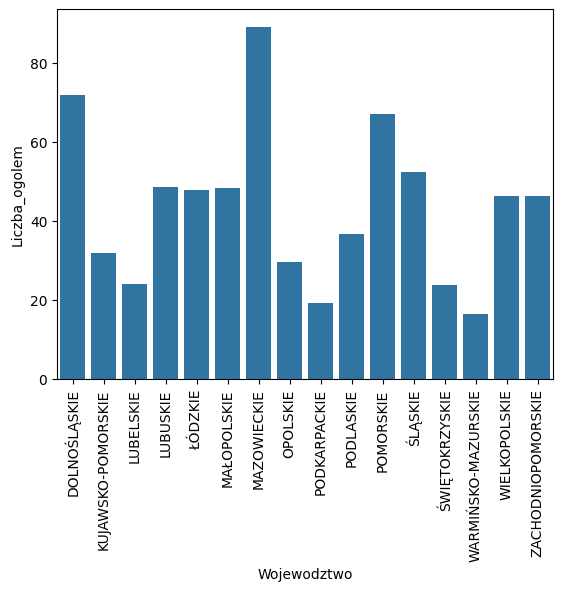

In [ ]:
sns.barplot(x=df['Wojewodztwo'], y=df['Liczba_ogolem'], errorbar=None, )
plt.xticks(rotation=90)

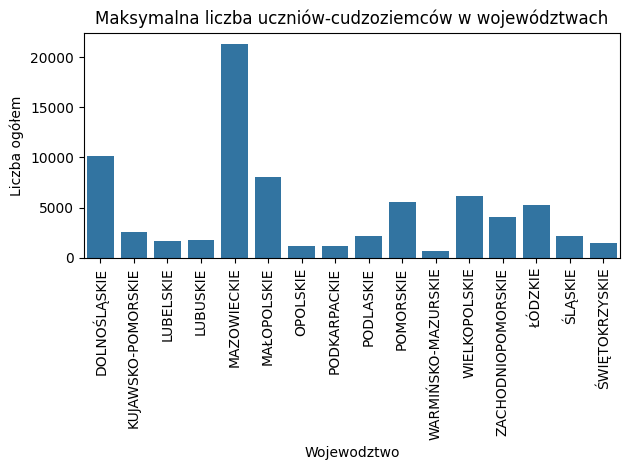

In [49]:
max_liczb_woj = df.groupby('Wojewodztwo')['Liczba_ogolem'].max().reset_index()
sns.barplot(x='Wojewodztwo', y='Liczba_ogolem', data=max_liczb_woj)
plt.xticks(rotation=90)
plt.ylabel("Liczba ogółem")
plt.title("Maksymalna liczba uczniów-cudzoziemców w województwach")
plt.tight_layout()
plt.show()

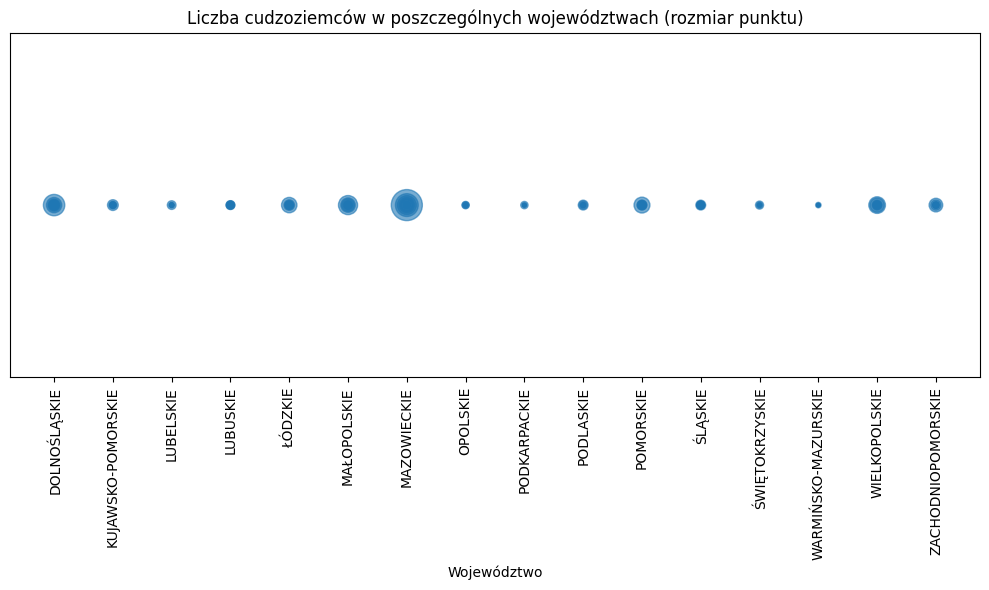

In [40]:
# Stwórzmy numeryczną reprezentację województw dla osi x
wojewodztwa = df['Wojewodztwo'].unique()
wojewodztwa_indices = np.arange(len(wojewodztwa))
wojewodztwo_map = {woj: i for i, woj in enumerate(wojewodztwa)}
df['Wojewodztwo_index'] = df['Wojewodztwo'].map(wojewodztwo_map)

# Skaluj rozmiary punktów, aby nie były zbyt małe lub zbyt duże
rozmiary = df['Liczba_ogolem'] / df['Liczba_ogolem'].max() * 500

plt.figure(figsize=(10, 6))
plt.scatter(df['Wojewodztwo_index'], np.zeros(len(df)), s=rozmiary, alpha=0.6)
plt.yticks([]) # Ukryj oś y
plt.xticks(wojewodztwa_indices, wojewodztwa, rotation=90)
plt.title("Liczba cudzoziemców w poszczególnych województwach (rozmiar punktu)")
plt.xlabel("Województwo")
plt.tight_layout()
plt.show()

del df['Wojewodztwo_index'] # Usuń tymczasową kolumnę

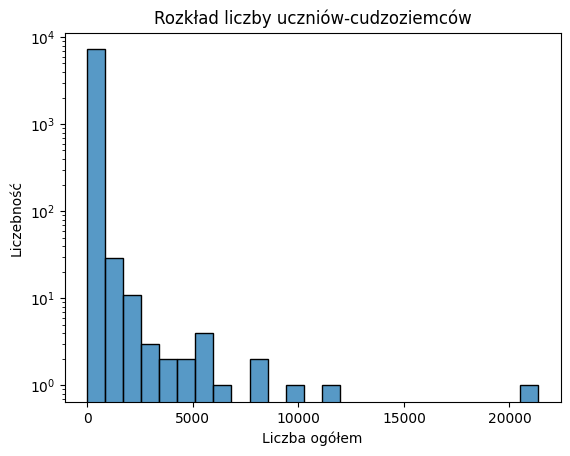

In [59]:

# 2. Rozkład zmiennej celu
sns.histplot(df['Liczba_ogolem'], bins=25)
plt.title("Rozkład liczby uczniów-cudzoziemców")

plt.xlabel("Liczba ogółem")
plt.ylabel("Liczebność")
plt.yscale('log')
plt.show()


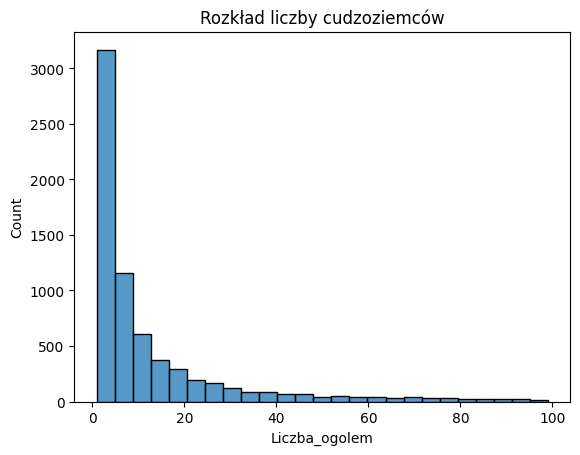

In [23]:

# 2. Rozkład zmiennej celu
sns.histplot(df[(df['Liczba_ogolem'] < 100)]['Liczba_ogolem'], bins=25)
plt.title("Rozkład liczby cudzoziemców")
plt.show()


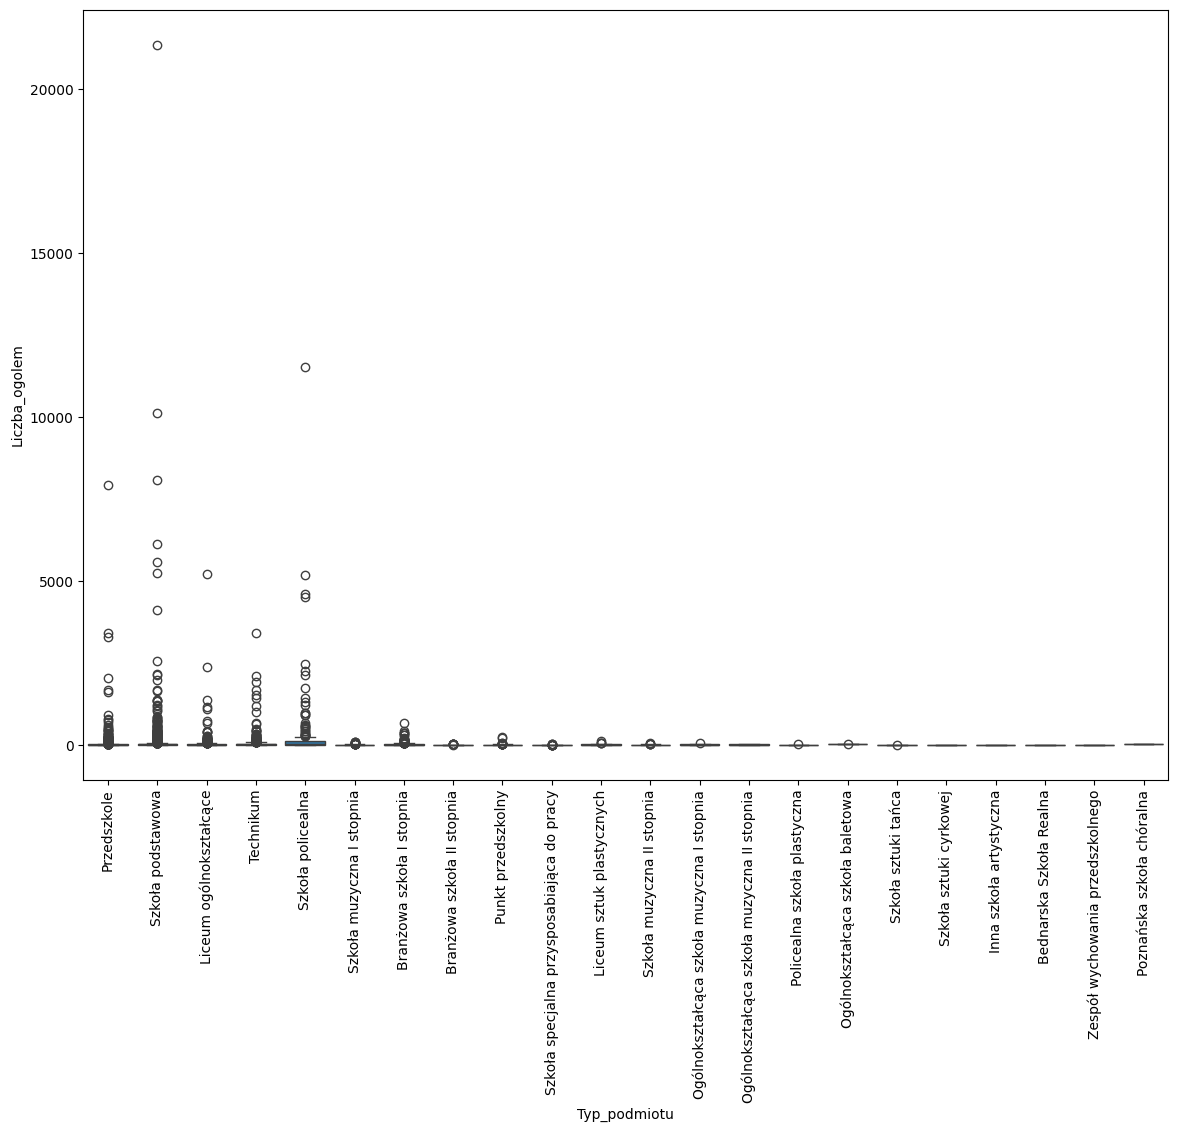

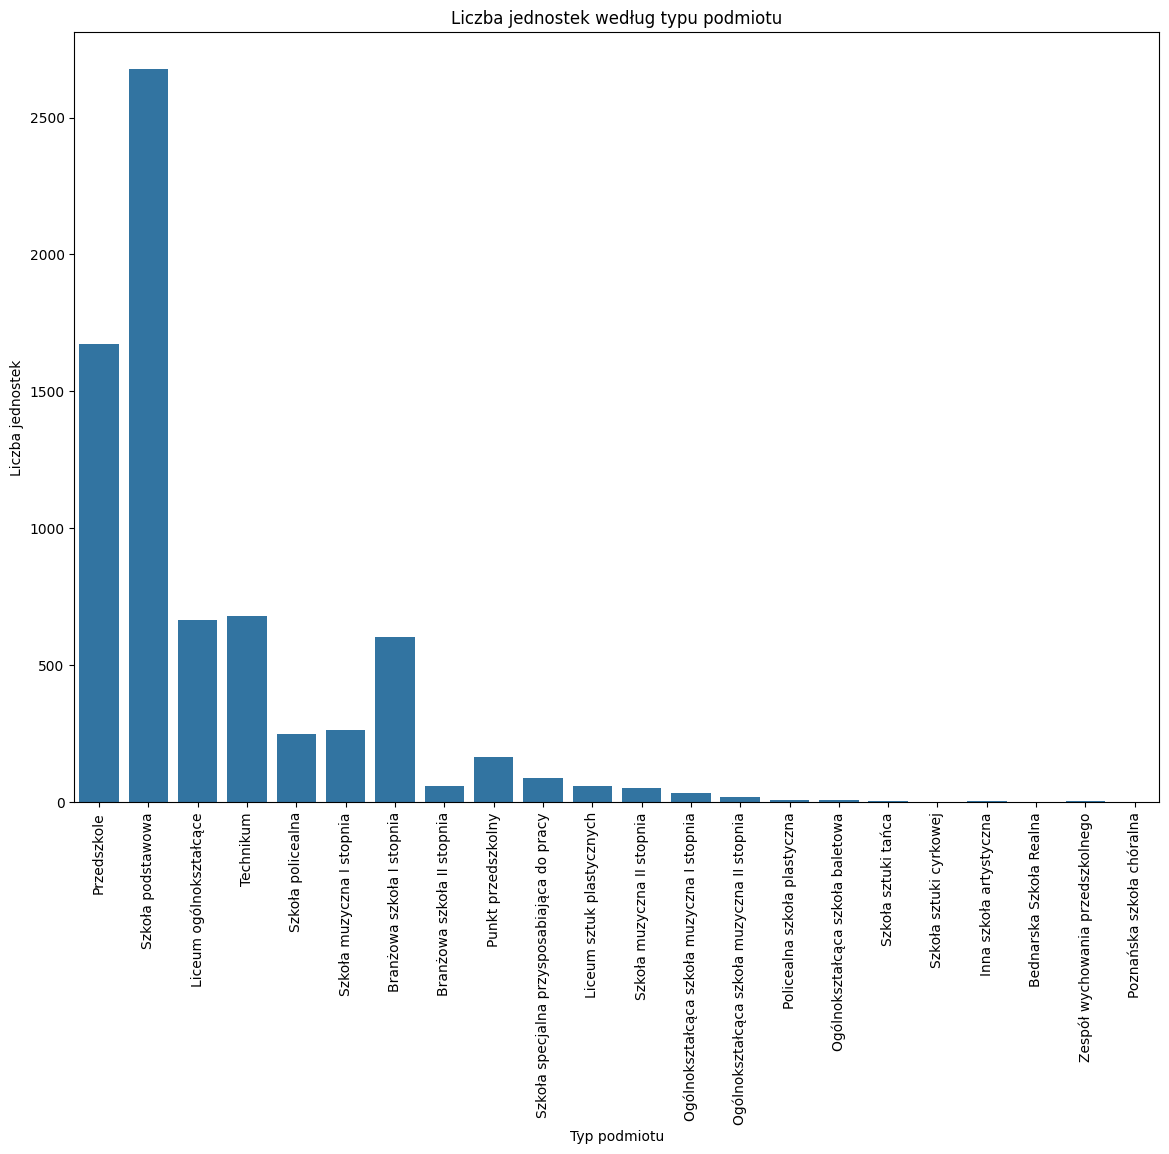

In [55]:

# 3. Typ podmiotu vs liczba cudzoziemców
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x='Typ_podmiotu', y='Liczba_ogolem')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14, 10))
sns.countplot(data=df, x='Typ_podmiotu')
plt.xticks(rotation=90)
plt.xlabel("Typ podmiotu")
plt.ylabel("Liczba jednostek")
plt.title("Liczba jednostek według typu podmiotu")
plt.show()

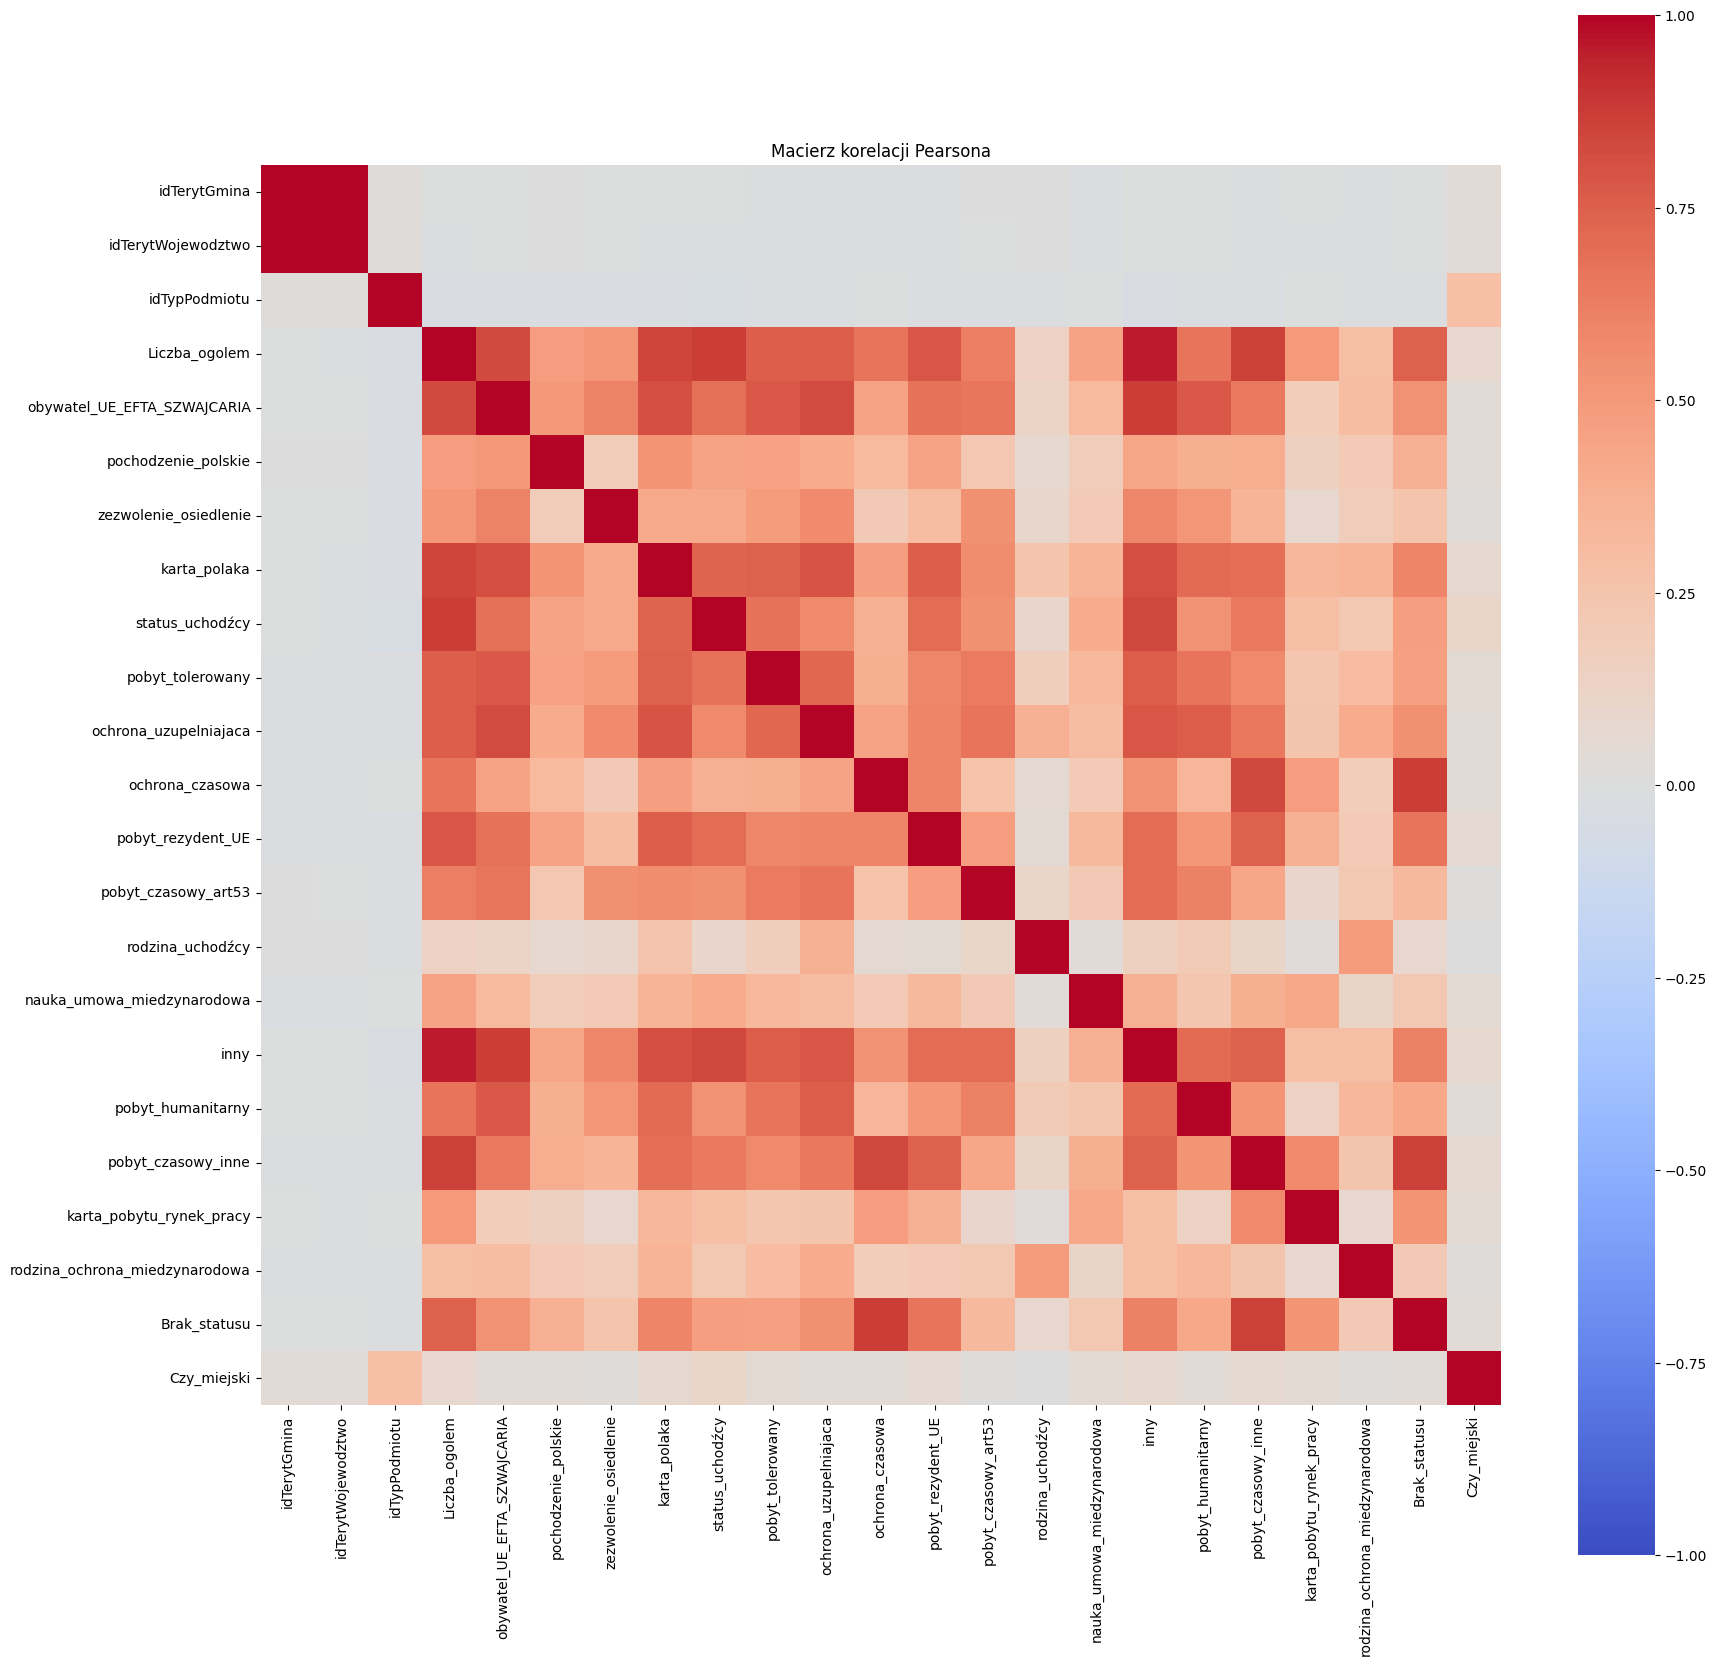

In [19]:

# 4. Korelacje między kolumnami liczbowymi

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, vmin=-1, vmax=1, square=True)
plt.title("Macierz korelacji Pearsona")
plt.show()



<Axes: xlabel='Liczba_ogolem', ylabel='Count'>

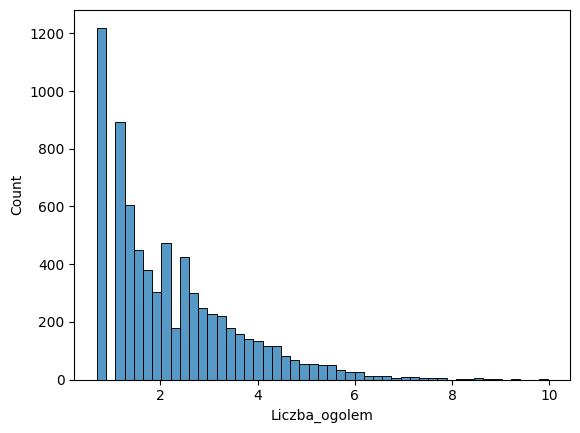

In [20]:
sns.histplot(np.log1p(df['Liczba_ogolem']))

Text(0, 0.5, 'Liczba ogółem')

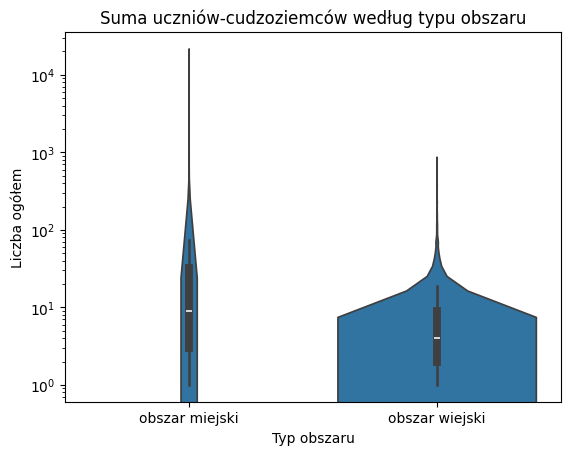

In [ ]:
sns.violinplot(data=df, x='Typ_obszaru', y='Liczba_ogolem')  # miejski vs wiejski
plt.title("Suma uczniów-cudzoziemców według typu obszaru")

plt.xlabel("Typ obszaru")
plt.ylabel("Liczba ogółem")

Text(0, 0.5, 'Liczba ogółem')

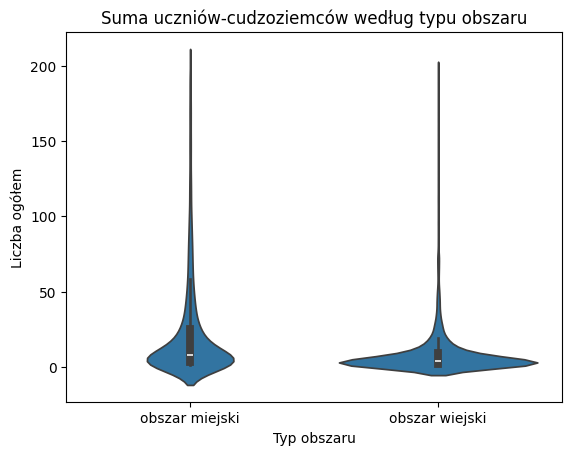

In [52]:
sns.violinplot(data=df[df['Liczba_ogolem'] < 200], x='Typ_obszaru', y='Liczba_ogolem')  # miejski vs wiejski
plt.title("Suma uczniów-cudzoziemców według typu obszaru")
plt.xlabel("Typ obszaru")
plt.ylabel("Liczba ogółem")

<Axes: xlabel='idTypPodmiotu', ylabel='Liczba_ogolem'>

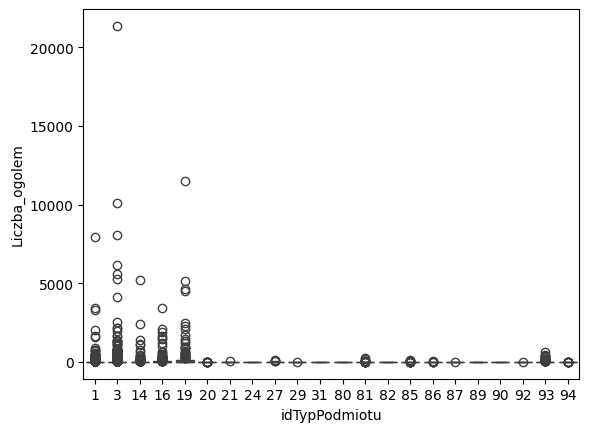

In [23]:
sns.boxplot(data=df, x='idTypPodmiotu', y='Liczba_ogolem')  # typy placówek


In [24]:
a = pd.get_dummies(df, columns=['Wojewodztwo'], prefix='wojewodztwo')
a

KeyError: "None of [Index(['Wojewodztwo'], dtype='object')] are in the [columns]"

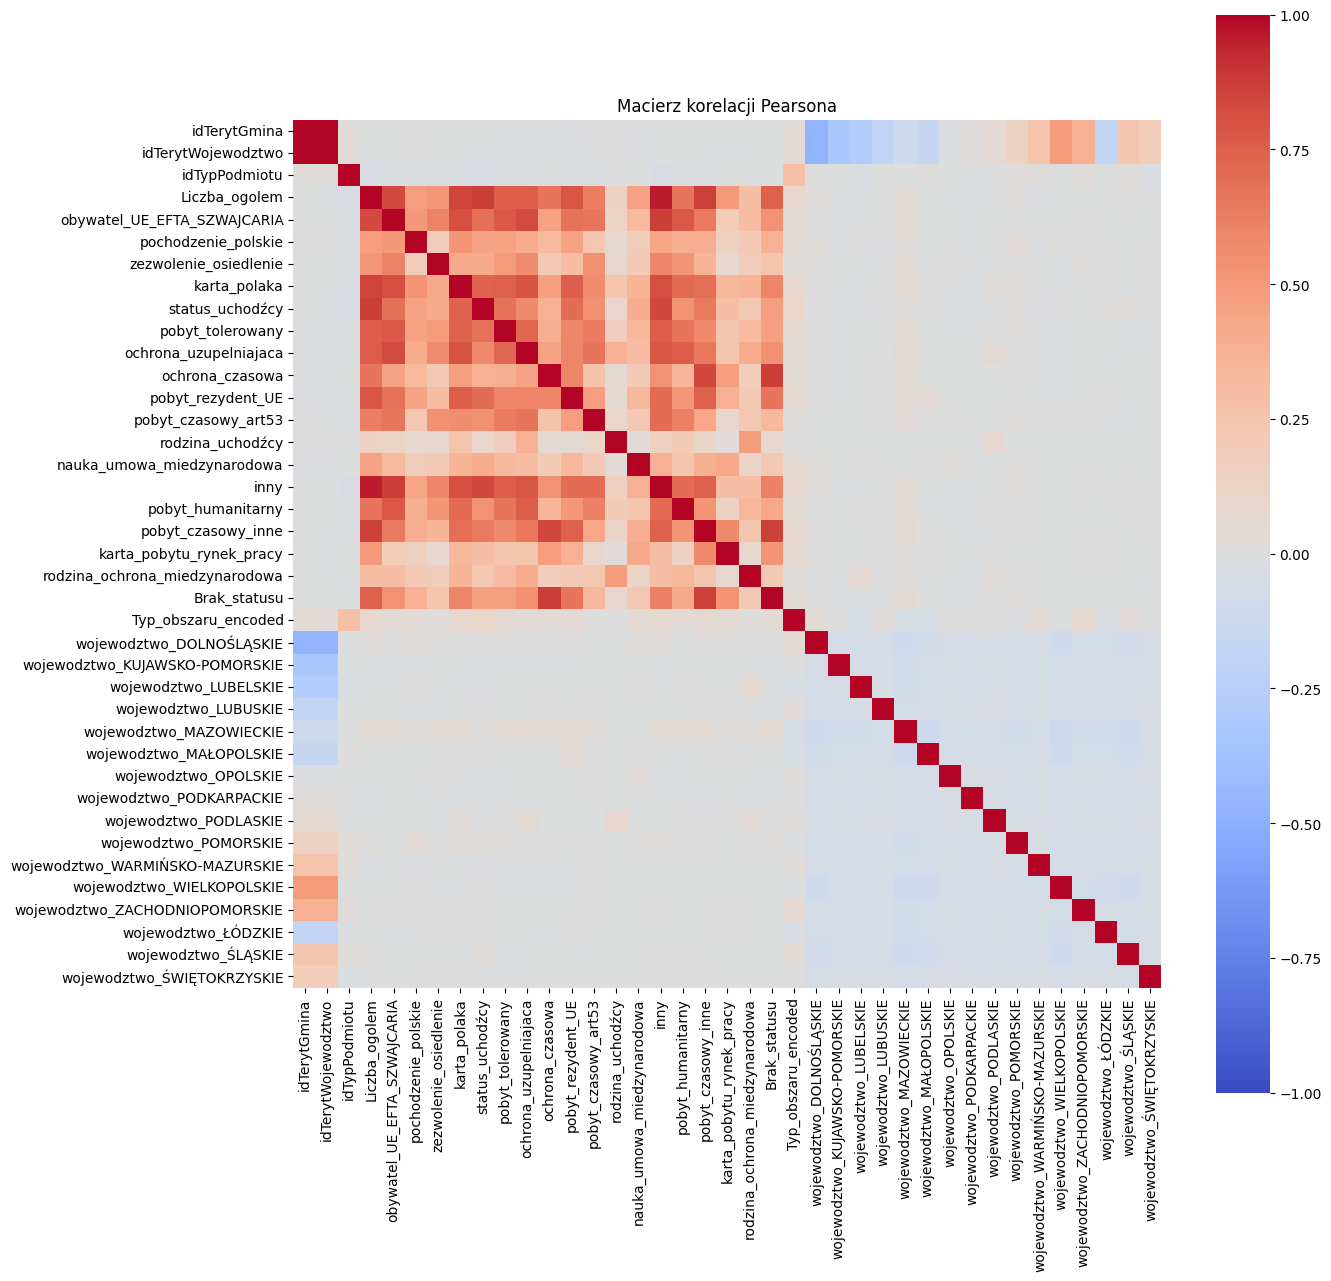

In [ ]:

# 4. Korelacje między kolumnami liczbowymi

plt.figure(figsize=(14, 14))
sns.heatmap(a.corr(numeric_only=True), cmap='coolwarm', annot=False, vmin=-1, vmax=1, square=True)
plt.title("Macierz korelacji Pearsona")
plt.show()

